# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude; download first in "pip install citipy"
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination by creating loop
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


645

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# save configuration infomration; url is from activity api day 2 "Ins_OpenWeatherRequest" and Ins_OpenWeatherDataFrame
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Create Dataframe for City Name, Country, Latitute, Longitude, Date, Temperature, Humidity, Wind Speed, clouds - will use for later
weather_df = pd.DataFrame({
    "City Name":[],
    "Country":[],
    "Latitude":[],
    "Longitude":[],
    "Date":[],
    "Temperature":[], 
    "Humidity":[],
    "Wind Speed":[],
    "Clouds":[]
})
weather_df

print("""

Beginning Data Retrieval     
-----------------------------
""")

# Create starting point for count
count = 1
# Create for loops to go through cities []
for i in range(len(cities)):
    #use Try except - watch video from extra video tuturols https://www.youtube.com/watch?v=k-ycJq0qUjg&feature=youtu.be
    try:
        #build partial query URL use "imperial"
        #https://openweathermap.desk.com/customer/en/portal/articles/1996493-switching-between-temperature-units
        query_url = f"{base_url}appid={api_key}&q={cities[i]}&units=imperial"
        print(f"Processing Record {count} of Set 1 | {cities[i]}")
        
        #use request.get to get information from url
        response = requests.get(query_url)
        #make in Json format
        weather_json = response.json()
        #weather_json - take a look and see which infomration we want and how its formated to find infomration we want
        
        city_country = weather_json["sys"]["country"]
        city_latitude = weather_json["coord"]["lat"]
        city_longitude = weather_json["coord"]["lon"]
        # https://docs.python.org/3/library/time.html#time.strftime
        city_date = time.strftime('%Y-%m-%d', time.localtime(weather_json["dt"]))
        city_max_temperature = weather_json["main"]["temp_max"]
        city_humidity = weather_json["main"]["humidity"]
        city_windspeed = weather_json["wind"]["speed"]
        city_cloud = weather_json["clouds"]["all"]
        
        #Build our dataframe with json data
        weather_df = weather_df.append({
            "City Name":cities[i],
            "Country":city_country,
            "Latitude":city_latitude,
            "Longitude":city_longitude,
            "Date":city_date,
            "Temperature":city_max_temperature, 
            "Humidity":city_humidity,
            "Wind Speed":city_windspeed,
            "Clouds":city_cloud
        }, ignore_index=True)
        
        #Adding one count for next record
        count+=1
        
    except:
        print("City not found. Skipping...")
print("""
-----------------------------
Data Retrieval Complete      
-----------------------------
""")



Beginning Data Retrieval     
-----------------------------

Processing Record 1 of Set 1 | evensk
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | cap malheureux
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | lulea
Processing Record 6 of Set 1 | alofi
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | muisne
Processing Record 11 of Set 1 | hobart
Processing Record 12 of Set 1 | kruisfontein
Processing Record 13 of Set 1 | verkh-usugli
Processing Record 14 of Set 1 | nikolskoye
Processing Record 15 of Set 1 | kurchum
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | codrington
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 19 of Set 1 | khatanga
Processing Record 20 of Set 1 | castro
Processing Record 21 of Set 1 | saint-augustin

Processing Record 167 of Set 1 | albany
Processing Record 168 of Set 1 | russell
Processing Record 169 of Set 1 | sorland
Processing Record 170 of Set 1 | chuy
Processing Record 171 of Set 1 | pevek
Processing Record 172 of Set 1 | sioux lookout
Processing Record 173 of Set 1 | makokou
Processing Record 174 of Set 1 | haines junction
Processing Record 175 of Set 1 | arandis
Processing Record 176 of Set 1 | sayyan
Processing Record 177 of Set 1 | boende
Processing Record 178 of Set 1 | matagami
Processing Record 179 of Set 1 | kavieng
Processing Record 180 of Set 1 | muros
Processing Record 181 of Set 1 | grindavik
Processing Record 182 of Set 1 | inuvik
Processing Record 183 of Set 1 | hofn
Processing Record 184 of Set 1 | richards bay
Processing Record 185 of Set 1 | georgetown
Processing Record 186 of Set 1 | port hardy
Processing Record 187 of Set 1 | todos santos
Processing Record 188 of Set 1 | mirnyy
Processing Record 189 of Set 1 | dergachi
Processing Record 190 of Set 1 | tukto

Processing Record 318 of Set 1 | sao joao da barra
Processing Record 319 of Set 1 | noumea
Processing Record 320 of Set 1 | gornyye klyuchi
Processing Record 321 of Set 1 | pictou
Processing Record 322 of Set 1 | miri
Processing Record 323 of Set 1 | uwayl
City not found. Skipping...
Processing Record 323 of Set 1 | bowen
Processing Record 324 of Set 1 | upington
Processing Record 325 of Set 1 | blagoevgrad
Processing Record 326 of Set 1 | immokalee
Processing Record 327 of Set 1 | tari
Processing Record 328 of Set 1 | destin
Processing Record 329 of Set 1 | inderborskiy
City not found. Skipping...
Processing Record 329 of Set 1 | benguela
Processing Record 330 of Set 1 | samarai
Processing Record 331 of Set 1 | boa vista
Processing Record 332 of Set 1 | goderich
Processing Record 333 of Set 1 | camana
City not found. Skipping...
Processing Record 333 of Set 1 | nongstoin
Processing Record 334 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 334 of Set 1 | japura
P

Processing Record 483 of Set 1 | maniitsoq
Processing Record 484 of Set 1 | uruzgan
Processing Record 485 of Set 1 | hanna
Processing Record 486 of Set 1 | andevoranto
City not found. Skipping...
Processing Record 486 of Set 1 | provost
Processing Record 487 of Set 1 | skalistyy
City not found. Skipping...
Processing Record 487 of Set 1 | brookings
Processing Record 488 of Set 1 | nanortalik
Processing Record 489 of Set 1 | along
Processing Record 490 of Set 1 | nhulunbuy
Processing Record 491 of Set 1 | bhanvad
Processing Record 492 of Set 1 | doha
Processing Record 493 of Set 1 | batagay-alyta
Processing Record 494 of Set 1 | pontal do parana
Processing Record 495 of Set 1 | hihifo
City not found. Skipping...
Processing Record 495 of Set 1 | katsuura
Processing Record 496 of Set 1 | tateyama
Processing Record 497 of Set 1 | malindi
Processing Record 498 of Set 1 | astipalaia
City not found. Skipping...
Processing Record 498 of Set 1 | tiznit
Processing Record 499 of Set 1 | kalmunai


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
# Display the DataFrame
weather_df


City Name Country  Latitude  Longitude        Date  Temperature  \
0            evensk      RU     61.92     159.24  2019-10-20        21.64   
1           ushuaia      AR    -54.81     -68.31  2019-10-20        27.94   
2    cap malheureux      MU    -19.98      57.61  2019-10-20        75.99   
3           mataura      NZ    -46.19     168.86  2019-10-20        46.00   
4             lulea      SE     65.58      22.15  2019-10-20        15.80   
5             alofi      NU    -19.06    -169.92  2019-10-20        77.00   
6    port elizabeth      US     39.31     -74.98  2019-10-20        57.00   
7         jamestown      AU    -33.21     138.60  2019-10-20        82.24   
8           rikitea      PF    -23.12    -134.97  2019-10-20        70.53   
9            muisne      EC      0.61     -80.02  2019-10-20        74.76   
10           hobart      AU    -42.88     147.33  2019-10-20        66.20   
11     kruisfontein      ZA    -34.00      24.73  2019-10-20        57.44   
12     verkh-usugli      RU     52.70     115.17  2019-10-20        26.61   
13       nikolskoye      RU     59.70      30.79  2019-10-20        51.80   
14          kurchum      KZ     48.57      83.65  2019-10-20        29.72   
15        busselton      AU    -33.64     115.35  2019-10-20        77.00   
16       codrington      AU    -28.95     153.24  2019-10-20        75.20   
17           bethel      US     60.79    -161.76  2019-10-20        35.60   
18         khatanga      RU     71.98     102.47  2019-10-20        19.63   
19           castro      CL    -42.48     -73.76  2019-10-20        41.00   
20   saint-augustin      CA     45.63     -73.98  2019-10-20        41.00   
21     punta arenas      CL    -53.16     -70.91  2019-10-20        39.20   
22      yellowknife      CA     62.45    -114.38  2019-10-20        23.00   
23             atar      MR     20.52     -13.05  2019-10-20        77.56   
24          salalah      OM     17.01      54.10  2019-10-20        87.73   
25    cockburn town      TC     21.46     -71.14  2019-10-20        83.56   
26         souillac      FR     45.60      -0.60  2019-10-20        48.00   
27   severo-kurilsk      RU     50.68     156.12  2019-10-20        42.48   
28             hilo      US     19.71    -155.08  2019-10-20        80.60   
29         yuanping      CN     38.72     112.71  2019-10-20        53.73   
..              ...     ...       ...        ...         ...          ...   
547            axim      GH      4.87      -2.24  2019-10-20        77.31   
548          aitape      PG     -3.15     142.36  2019-10-20        86.44   
549            kabo      CF      7.69      18.62  2019-10-20        73.55   
550          muroto      JP     33.37     134.14  2019-10-20        69.80   
551    saint-joseph      FR     43.56       6.97  2019-10-20        64.40   
552      savasleyka      RU     55.46      42.32  2019-10-20        52.67   
553        meulaboh      ID      4.14      96.13  2019-10-20        79.89   
554          gorele      TR     41.03      39.00  2019-10-20        64.40   
555        takoradi      GH      4.89      -1.75  2019-10-20        74.00   
556       marquette      US     46.54     -87.40  2019-10-20        46.99   
557          nyagan      RU     62.14      65.43  2019-10-20        32.29   
558        canutama      BR     -6.53     -64.38  2019-10-20        71.71   
559    general roca      AR    -39.03     -67.58  2019-10-20        59.00   
560        masvingo      ZW    -20.08      30.83  2019-10-20        84.94   
561       sotouboua      TG      8.56       0.98  2019-10-20        71.88   
562          nacala      MZ    -14.56      40.69  2019-10-20        85.36   
563     grand-santi      GF      4.27     -54.38  2019-10-20        71.01   
564   qasigiannguit      GL     68.82     -51.19  2019-10-20        19.40   
565       omsukchan      RU     62.53     155.80  2019-10-20         9.20   
566         kaneohe      US     21.42    -157.80  2019-10-20        82.40   
567   

In [10]:
# Export to CSV
weather_df.to_csv('cities.csv')

In [11]:
# Describe DataFrame
weather_df.describe()

Latitude   Longitude  Temperature    Humidity  Wind Speed      Clouds
count  577.000000  577.000000   577.000000  577.000000  577.000000  577.000000
mean    21.735789   16.102738    58.970988   72.920277    7.425511   53.443674
std     33.087240   88.830602    21.610787   22.491060    5.353993   38.311371
min    -54.810000 -179.170000    -1.680000    7.000000    0.200000    0.000000
25%     -3.310000  -61.860000    43.000000   62.000000    3.360000   12.000000
50%     26.420000   15.630000    63.000000   80.000000    5.950000   67.000000
75%     49.720000   90.440000    77.000000   91.000000   10.830000   90.000000
max     78.220000  179.320000   104.000000  100.000000   34.450000  100.000000

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

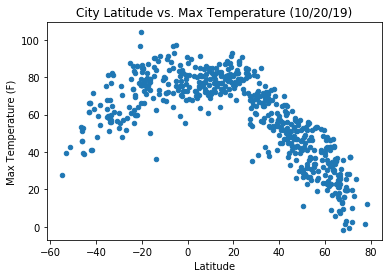

In [28]:
# Create scatter plot x asix and y asix to be Latitute and temperature, respectively
lat_temp_plt = weather_df.plot.scatter(x='Latitude', y='Temperature', title='City Latitude vs. Max Temperature (10/20/19)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Save image as ping
plt.savefig('Latitude vs Temperature.png')

#### Latitude vs. Humidity Plot

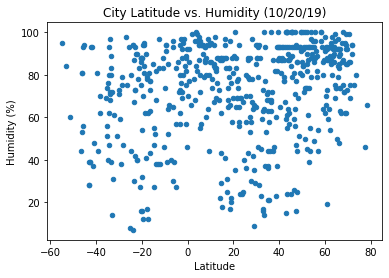

In [29]:
# Create scatter plot x asix and y asix to be columns Latitude and Humidity, respectively
lat_temp_plt = weather_df.plot.scatter(x='Latitude', y='Humidity', title='City Latitude vs. Humidity (10/20/19)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save image as ping
plt.savefig('Latitude vs Humidity.png')

#### Latitude vs. Cloudiness Plot

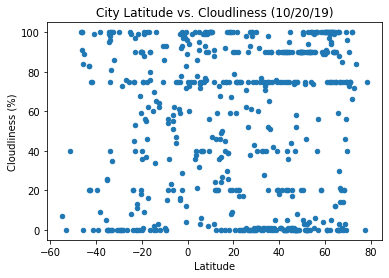

In [30]:
# Create scatter plot x asix and y asix to be columns Latitude and Humidity, respectively
lat_temp_plt = weather_df.plot.scatter(x='Latitude', y='Clouds', title='City Latitude vs. Cloudliness (10/20/19)')
plt.xlabel('Latitude')
plt.ylabel('Cloudliness (%)')

# Save image as ping
plt.savefig('Latitude vs Cloudliness.png')

#### Latitude vs. Wind Speed Plot

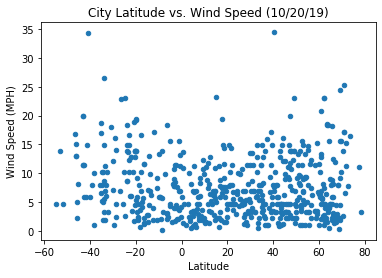

In [31]:
# Create scatter plot x asix and y asix to be columns Latitude and Humidity, respectively
lat_temp_plt = weather_df.plot.scatter(x='Latitude', y='Wind Speed', title='City Latitude vs. Wind Speed (10/20/19)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')

# Save image as ping
plt.savefig('Latitude vs Windspeed.png')